# Fully-connected network (regression)

In [2]:
# Use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' 

In [3]:
import tensorflow as tf

In [4]:
print("TensorFlow version: %s" % tf.__version__)

TensorFlow version: 1.15.0


In [5]:
tf.enable_eager_execution()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
np.random.seed(456)
tf.set_random_seed(456)

In [8]:
def pearson_r2_score(y, y_pred):
    """Computes Pearson R^2 (square of Pearson correlation)."""
    return pearsonr(y, y_pred)[0]**2

## Generate synthetic data

In [9]:
d = 1
N = 50
w_true = 5
b_true = 2
noise_scale = .1

In [10]:
x_np = tf.random.uniform([N, 1])
noise = tf.random.normal([N, 1], stddev=noise_scale)
y_np = w_true * x_np + b_true + noise

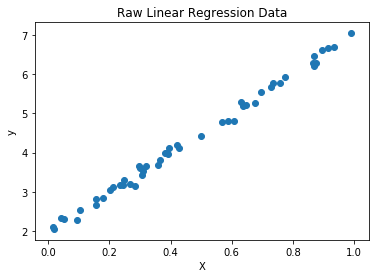

In [11]:
# Save image of the data distribution
plt.scatter(x_np, y_np)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Raw Linear Regression Data")
plt.savefig("fcnet_regression_data.png")

- Network definition

In [12]:
def net(x, W_1, b_1, W_2, b_2):
    x_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1)
    Y = tf.matmul(x_1, W_2) + b_2
    return Y

In [13]:
x = tf.convert_to_tensor(x_np)
y = tf.convert_to_tensor(y_np)

In [14]:
n_hidden = 15

In [15]:
W_1 = tf.Variable(tf.random_normal((d, n_hidden)))
b_1 = tf.Variable(tf.random_normal((n_hidden,)))

W_2 = tf.Variable(tf.random_normal((n_hidden, 1)))
b_2 = tf.Variable(tf.random_normal((1,)))

In [16]:
train_op = tf.train.AdamOptimizer(.001)

In [17]:
summary_writer = tf.contrib.summary.create_file_writer('/tmp/fcnet-regression-train')

W1026 10:06:07.015469 23060 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## Train model

In [18]:
n_steps = 1000

for i in range(n_steps):
    with tf.GradientTape() as tape:
        y_pred = net(x, W_1, b_1, W_2, b_2)
        lvec = (y - y_pred)**2
        l = tf.reduce_sum(lvec)

        grads = tape.gradient(l, (W_1, b_1, W_2, b_2) )
        train_op.apply_gradients(zip(grads, (W_1, b_1, W_2, b_2)))

        # Log
        with summary_writer.as_default(), tf.contrib.summary.always_record_summaries():
            tf.contrib.summary.scalar("loss", l, step=i)

        if i % 50 == 0:
            print("step %d, loss: %f, loss-vec-size: %s" % (i, l.numpy(), lvec.shape))

step 0, loss: 988.909973, loss-vec-size: (50, 1)
step 50, loss: 727.287659, loss-vec-size: (50, 1)
step 100, loss: 526.999512, loss-vec-size: (50, 1)
step 150, loss: 373.754028, loss-vec-size: (50, 1)
step 200, loss: 249.614059, loss-vec-size: (50, 1)
step 250, loss: 176.322937, loss-vec-size: (50, 1)
step 300, loss: 128.962173, loss-vec-size: (50, 1)
step 350, loss: 93.599274, loss-vec-size: (50, 1)
step 400, loss: 69.002151, loss-vec-size: (50, 1)
step 450, loss: 51.030251, loss-vec-size: (50, 1)
step 500, loss: 37.157726, loss-vec-size: (50, 1)
step 550, loss: 26.624836, loss-vec-size: (50, 1)
step 600, loss: 18.829721, loss-vec-size: (50, 1)
step 650, loss: 13.168104, loss-vec-size: (50, 1)
step 700, loss: 9.173429, loss-vec-size: (50, 1)
step 750, loss: 6.397064, loss-vec-size: (50, 1)
step 800, loss: 4.481261, loss-vec-size: (50, 1)
step 850, loss: 3.184352, loss-vec-size: (50, 1)
step 900, loss: 2.333014, loss-vec-size: (50, 1)
step 950, loss: 1.782060, loss-vec-size: (50, 1)


In [19]:
summary_writer.flush()
summary_writer.close()

In [20]:
y_pred_np = net(x, W_1, b_1, W_2, b_2)
r2 = pearson_r2_score( np.reshape(y_np.numpy(), -1), np.reshape(y_pred_np, -1) )
print("Pearson R^2: %f" % r2)

Pearson R^2: 0.988859


## Visualize result

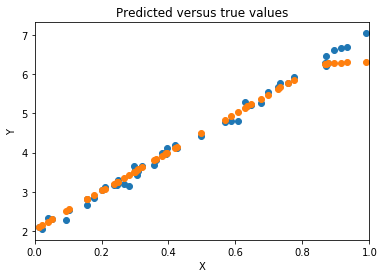

In [21]:
# Clear figure
plt.clf()
plt.xlabel("Y-true")
plt.ylabel("Y-pred")
plt.title("Predicted versus true values")
plt.scatter(y_np, y_pred_np)
plt.savefig("fcnet_regression_pred.png")

# Now draw with learned regression line
plt.clf()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Predicted versus true values")
plt.xlim(0, 1)
plt.scatter(x_np, y_np)
plt.scatter(x_np, y_pred_np)
plt.savefig("fcnet_regression_learned.png")